# Exercise 12.3
Firstly I load the previously fitted model:

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1' #just to tell my pc not to use CUDA for this simple task

In [9]:
from tensorflow.keras.models import load_model

model_CNN = load_model(filepath="model/conv_model_inverted")

## Loading images
I will load all the images in an array

In [10]:
from tensorflow.keras.preprocessing import image
img=[]
for i in range(10):
    img.append(image.load_img("images/"+str(i)+"_1.png", target_size=(28, 28),color_mode="grayscale"))

Rescale and resize

In [11]:
img_nn=[]
for i in img:
    img_nn.append( image.img_to_array(i))

img_nn=np.array(img_nn)
img_nn/=255

In [12]:
prediction=model_CNN.predict(img_nn)

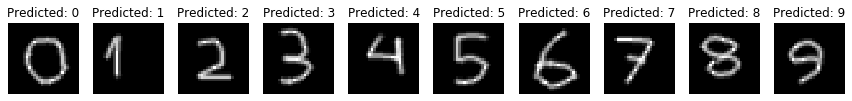

In [13]:
plt.figure(figsize=(15,15))
for i in range(len(img_nn)):
    ax = plt.subplot(2, 10, i + 1)  
    plt.imshow(img[i], cmap='gray')    
    plt.title("Predicted: {}".format(np.argmax(prediction[i])))
    plt.axis('off') 
plt.show()

Note that, before using the trick of shifting the positions, I struggled a lot to make a neural network recognize my "one" (hardly shifted to the left).

### Inverted image
Let's see the performance on some inverted color digits

In [14]:
inverted_img=[]
for i in range(10):
    inverted_img.append(image.load_img("images/inverted/"+str(i)+"_2.png", target_size=(28, 28),color_mode="grayscale"))

In [15]:
inverted_nn=[]
for i in inverted_img:
    inverted_nn.append( image.img_to_array(i))

inverted_nn=np.array(inverted_nn)
inverted_nn/=255

In [16]:
prediction_inverted=model_CNN.predict(inverted_nn)

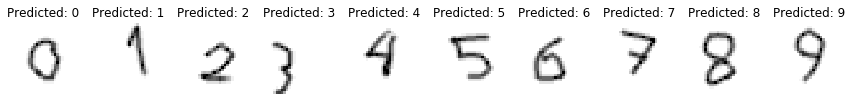

In [17]:
plt.figure(figsize=(15,15))
for i in range(len(img_nn)):
    ax = plt.subplot(2, 10, i + 1)  
    plt.imshow(inverted_img[i], cmap='gray')    
    plt.title("Predicted: {}".format(np.argmax(prediction[i])))
    plt.axis('off') 
plt.show()

### No data agumentation
In the following lines I am using a neural network identical to the previous one, but trained on data that wasn't augmented (not shifted and rotated randomly). Let's see how this impact the learning.

In [22]:
model_CNN = load_model(filepath="model/model_inverted_centered")

In [23]:
prediction=model_CNN.predict(img_nn)

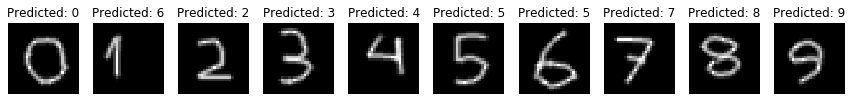

In [24]:
plt.figure(figsize=(15,15))
for i in range(len(img_nn)):
    ax = plt.subplot(2, 10, i + 1)  
    plt.imshow(img[i], cmap='gray')    
    plt.title("Predicted: {}".format(np.argmax(prediction[i])))
    plt.axis('off') 
plt.show()

The NN struggles to recognise the not centered numer one (and the six too, but why this is less clear to me...)